### Part 1: Introduction
 
---

Running numpy on GPU, with some nice helper functions.

GPU responsible for small calculations, have a lot more cores than CPU

CPU responsible for large calcultions

In [2]:
import torch

x = torch.Tensor([3,5])
y = torch.Tensor([2,1])
print(x*y)

tensor([6., 5.])


In [3]:
x = torch.zeros([3,1])
x

tensor([[0.],
        [0.],
        [0.]])

In [4]:
x.shape

torch.Size([3, 1])

In [5]:
y = torch.rand([2,5])
y

tensor([[0.9406, 0.7457, 0.2727, 0.8933, 0.9393],
        [0.4339, 0.1879, 0.1300, 0.6488, 0.8180]])

Reshape: flatten the array

In [6]:
y = y.view([1,10])
y

tensor([[0.9406, 0.7457, 0.2727, 0.8933, 0.9393, 0.4339, 0.1879, 0.1300, 0.6488,
         0.8180]])

### Part 2: Data
---

- Is the data machine-learnable?
- 90% of time is spent on data collection
- Vision is the main interest

- Training and testing data sets

> hi

In [11]:
import torchvision
from torchvision import transforms, datasets

- MNIST: hand-drawn digits from 0 to 9
- 28 x 28 image

In [12]:
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))


- Use batch_size, instead of passing data in one go
- because data cannot fit into GPU
- and to hope that the data will generalise
- batch_size between 8 and 64
---
- shuffle: to make neural network generalise/ learn general rules instead of quicker routes

16:00


In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

- Iterate over data

In [13]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [15]:
# x is the image
# y is the label

x, y = data[0][0], data[1][0]

print(y)

tensor(1)


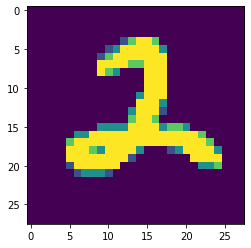

In [20]:
import matplotlib.pyplot as plt

# reshape the tensor to 28 by 28

plt.imshow(data[0][3].view(28,28))

### Balancing dataset
---
-

In [23]:
# printing how balanced the dataset is

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0 }

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [25]:
# distribution of dataset

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


### Part 3. Building neural network
---


In [29]:
import torch.nn as nn # OOP
import torch.nn.functional as F # Functions

In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define the fully connected layers to the network
        # 784 = 28 x 28: flattened
        # three layers of 64 neurons
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
       
    
    # how data is flow through the network
    # feed-forward network
    # activation function, adjust weight, biases
    def forward(self, x):
        # rectified linear: activation function: whether the neuron is firing, 
        # stepper/sigmoid function, loss explosion
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        # 
        return F.log_softmax(x, dim=1)
    
        
        
     
net = Net()

print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [49]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

# -1 specify that the input is unknown shape

In [47]:
output = net(X)
output

tensor([[-2.2046, -2.2746, -2.2510, -2.3563, -2.4195, -2.3982, -2.3750, -2.2165,
         -2.2122, -2.3486]], grad_fn=<LogSoftmaxBackward>)

### Part 4. Pass through labeled data and train the model
---
- loss
- measure of how wrong the model is
- we want to decrease loss
---

- optimizer
- adjust weights based on loss, gradients to lower the loss
- calculate loss based on the output, comapre to desired output
- we optimize for loss, not for accuracy

In [53]:
import torch.optim as optim

# learning rate: cannot be too large or small
# decaying learning rate
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature sets and Labels
        X, y = data
        
        # zero gradients before start
        net.zero_grad()
        
        # pass data through the network
        output = net(X.view(-1, 28*28))
        
        # how wrong were we
        loss = F.nll_loss(output, y)
        
        # back propagate the loss
        loss.backward()
        
        # adjust weights
        optimizer.step()
        
    print(loss)

tensor(0.1093, grad_fn=<NllLossBackward>)
tensor(0.0792, grad_fn=<NllLossBackward>)
tensor(0.0468, grad_fn=<NllLossBackward>)


In [54]:
correct = 0
total = 0

# we don't want to calculate the gradient
# we just want to know how good the network is
# so use no_grad()
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        
        # for every prediction, does it match the actual target value
        for idx, i in enumerate(output):
            if torch.argmax(i)== y[idx]:
                correct += 1
            total += 1
            

print("Accuracy: ", round(correct/total,3))

Accuracy:  0.981


In [55]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

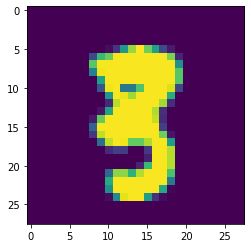

In [62]:
import matplotlib.pyplot as plt
plt.imshow(X[5].view(28,28))
plt.show()

In [63]:
print(torch.argmax(net(X[5].view(-1,784))[0]))

tensor(3)
